In [1]:
# pip install yfinance

In [2]:
# Load Packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Define the list of stock symbols
symbols = ['PLANB.BK', 'KKP.BK', 'TU.BK', 'BDMS.BK']

# Fetch data using yfinance
df = yf.download(symbols, start='2022-01-01', end='2022-12-22')

# Print the first few rows of the DataFrame
print(df.head())

[*********************100%%**********************]  4 of 4 completed
            Adj Close                                      Close         \
              BDMS.BK     KKP.BK  PLANB.BK      TU.BK    BDMS.BK KKP.BK   
Date                                                                      
2022-01-04  21.481894  55.627026  7.975257  17.922285  22.400000  61.50   
2022-01-05  21.769598  55.627026  7.826650  18.193836  22.700001  61.50   
2022-01-06  21.481894  56.531532  7.529436  18.555902  22.400000  62.50   
2022-01-07  21.673695  56.983784  7.529436  18.555902  22.600000  63.00   
2022-01-10  21.769598  59.018921  7.479900  18.736937  22.700001  65.25   

                                     High         ...      Low             \
           PLANB.BK      TU.BK    BDMS.BK KKP.BK  ... PLANB.BK      TU.BK   
Date                                              ...                       
2022-01-04     8.05  19.799999  23.100000  61.75  ...     7.65  19.600000   
2022-01-05     7.90  2

In [4]:
# Closing price
df = df['Adj Close']
df.head()

,BDMS.BK,KKP.BK,PLANB.BK,TU.BK
Date,,,,
2022-01-04,21.481894,55.627026,7.975257,17.922285
2022-01-05,21.769598,55.627026,7.826650,18.193836
2022-01-06,21.481894,56.531532,7.529436,18.555902
2022-01-07,21.673695,56.983784,7.529436,18.555902
2022-01-10,21.769598,59.018921,7.479900,18.736937


In [5]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,BDMS.BK,KKP.BK,PLANB.BK,TU.BK
BDMS.BK,0.000217,0.000034,0.000025,0.000018
KKP.BK,0.000034,0.000167,0.000047,0.000031
PLANB.BK,0.000025,0.000047,0.000406,0.000064
TU.BK,0.000018,0.000031,0.000064,0.000222


In [6]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,BDMS.BK,KKP.BK,PLANB.BK,TU.BK
BDMS.BK,1.000000,0.177079,0.082640,0.083051
KKP.BK,0.177079,1.000000,0.180043,0.158655
PLANB.BK,0.082640,0.180043,1.000000,0.214687
TU.BK,0.083051,0.158655,0.214687,1.000000


In [7]:
# Randomly weighted portfolio's variance
w = {'PLANB.BK': 0.25, 'KKP.BK': 0.25, 'TU.BK': 0.25, 'BDMS.BK': 0.25}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var.round(4)

0.0001

In [30]:
# Change df daily price to get Monthly returns for individual companies by .resample('M')
ind_er = df.resample('M').last().pct_change().apply(lambda x: np.log(1+x)).mean().apply(lambda x: np.
ind_er

BDMS.BK     0.024746
KKP.BK      0.012196
PLANB.BK   -0.003128
TU.BK      -0.014288
dtype: float64

In [27]:
# Portfolio returns
w = [0.25, 0.25, 0.25, 0.25]
port_er = (w*ind_er).sum()
port_er.round(4)

0.0049

In [10]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

BDMS.BK     0.232849
KKP.BK      0.204136
PLANB.BK    0.318693
TU.BK       0.235514
dtype: float64

In [11]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
BDMS.BK,0.024746,0.232849
KKP.BK,0.012196,0.204136
PLANB.BK,-0.003128,0.318693
TU.BK,-0.014288,0.235514


In [12]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

In [13]:
num_assets = len(df.columns)
num_portfolios = 10000

In [14]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [15]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [16]:
for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [17]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BDMS.BK weight,KKP.BK weight,PLANB.BK weight,TU.BK weight
0,0.007343,0.145274,0.351324,0.233951,0.154246,0.260479
1,0.012974,0.156927,0.494038,0.223113,0.185403,0.097446
2,0.005904,0.143898,0.282556,0.279832,0.156929,0.280683
3,-0.000963,0.186791,0.212328,0.008148,0.432000,0.347523
4,0.011349,0.158108,0.487845,0.158578,0.214579,0.138997


<Axes: xlabel='Volatility', ylabel='Returns'>

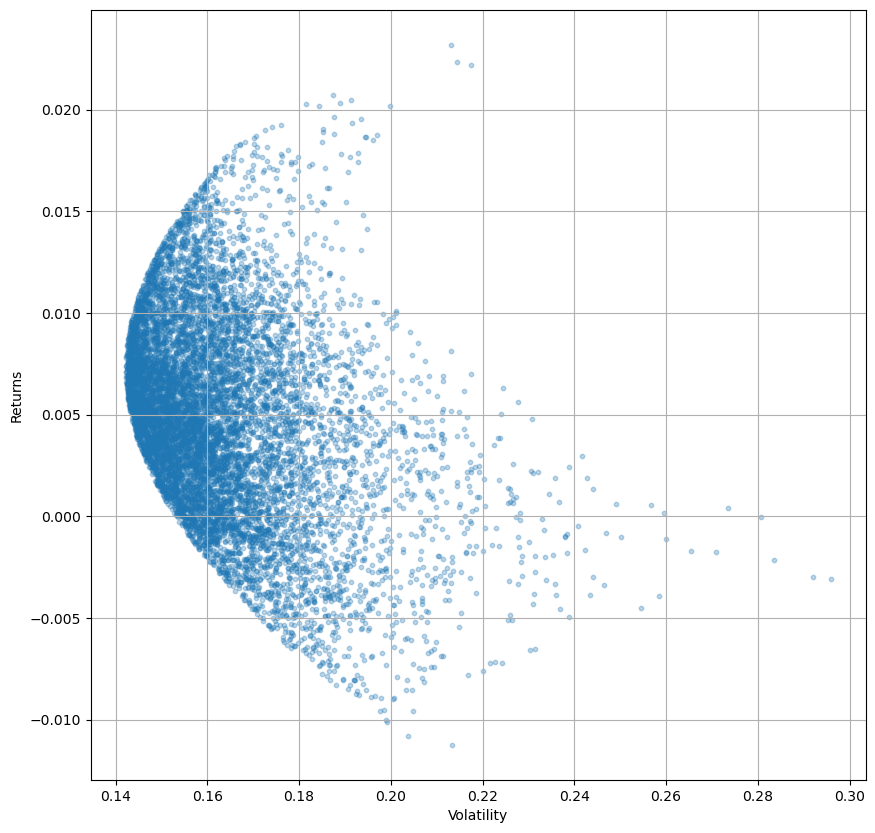

In [18]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [19]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns            0.007076
Volatility         0.142255
BDMS.BK weight     0.289696
KKP.BK weight      0.336684
PLANB.BK weight    0.102059
TU.BK weight       0.271560
Name: 6451, dtype: float64

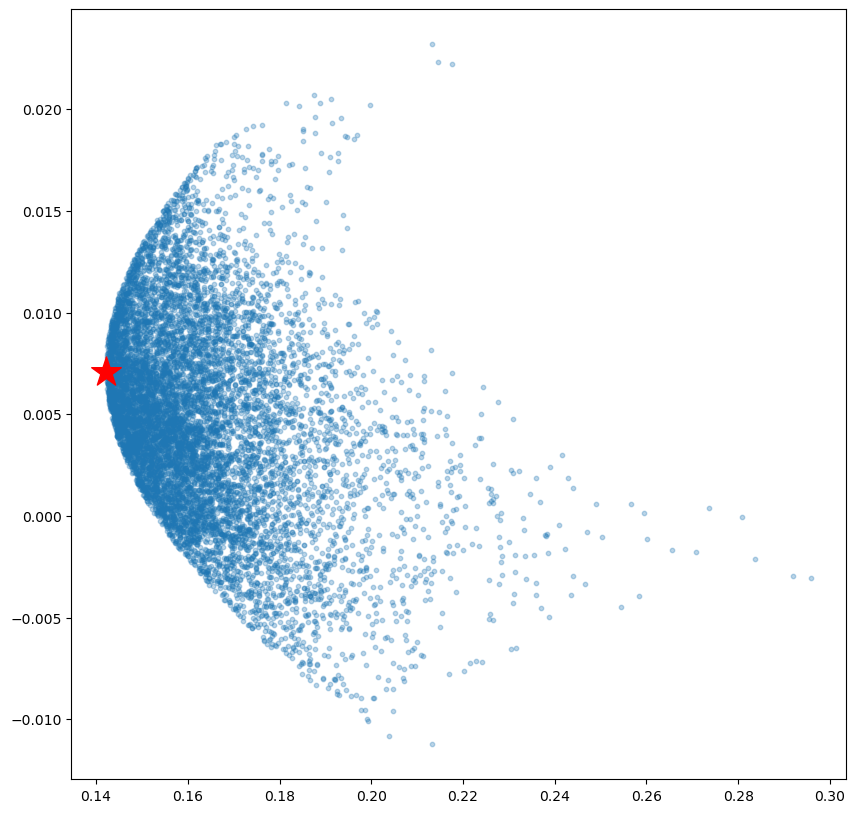

In [20]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


In [21]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns            0.023196
Volatility         0.213175
BDMS.BK weight     0.896349
KKP.BK weight      0.093274
PLANB.BK weight    0.002234
TU.BK weight       0.008143
Name: 3152, dtype: float64

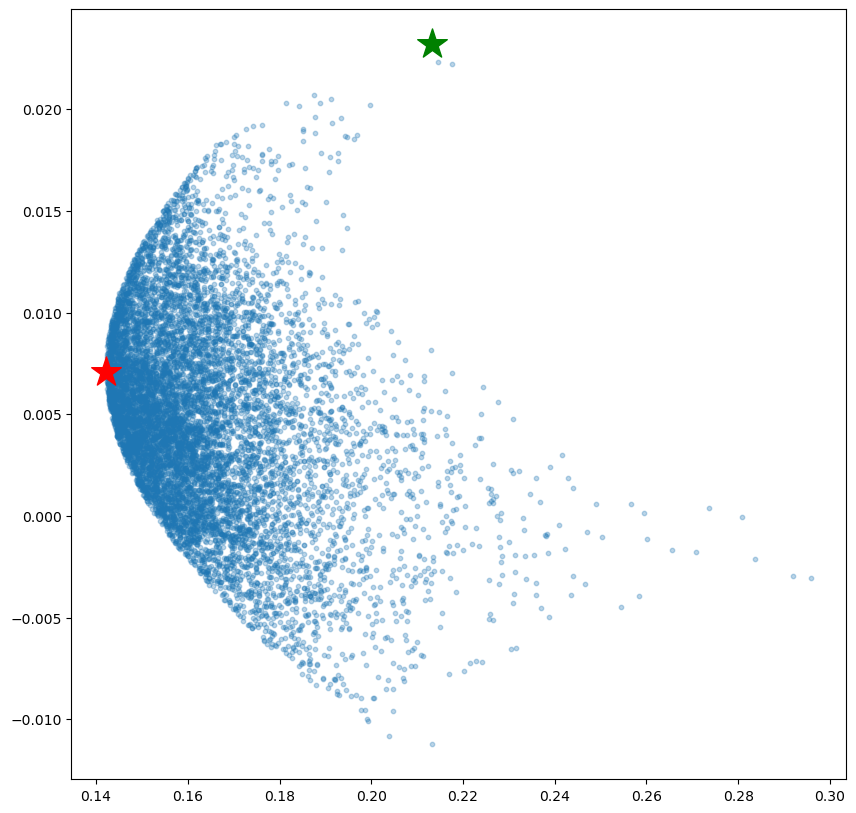

In [22]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)